# LangGrpah 雙代理通用

## 套件引入與數值初始化

In [2]:
from tw_textforge.agent.ai_model import AIModel
from tw_textforge.agent.printer import pretty_print_messages
from tw_textforge.agent.general.multi_agnet_graph import GeneralMultiAgentGraph

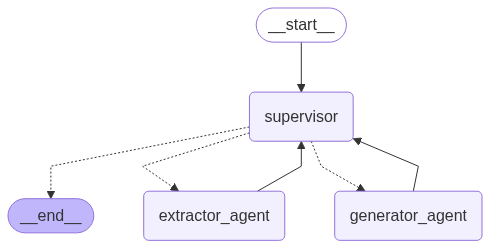

In [3]:
llm = AIModel().llm
generalgraph_obj = GeneralMultiAgentGraph(supervisor_llm=llm, generator_llm=llm, generator_llm_tools=[], extractor_llm=llm)
generalgraph_obj.show_graph()

In [4]:
for chunk in generalgraph_obj.graph.stream(
    {
        "messages": [
            {
                "role": "user",
                "content": "在軟體工程中，什麼是資料庫?",
            }
        ]
    },
):
    pretty_print_messages(chunk, last_message=True)

Task supervisor with path ('__pregel_pull', 'supervisor') wrote to unknown channel is_last_step, ignoring it.
Task supervisor with path ('__pregel_pull', 'supervisor') wrote to unknown channel remaining_steps, ignoring it.


Update from node supervisor:


================================= Tool Message =================================
Name: transfer_to_generator_agent

Successfully transferred to generator_agent


Update from node generator_agent:


================================= Tool Message =================================
Name: transfer_back_to_supervisor

Successfully transferred back to supervisor




Task supervisor with path ('__pregel_pull', 'supervisor') wrote to unknown channel is_last_step, ignoring it.
Task supervisor with path ('__pregel_pull', 'supervisor') wrote to unknown channel remaining_steps, ignoring it.


Update from node supervisor:


================================= Tool Message =================================
Name: transfer_to_extractor_agent

Successfully transferred to extractor_agent


Update from node extractor_agent:


================================= Tool Message =================================
Name: transfer_back_to_supervisor

Successfully transferred back to supervisor


Update from node supervisor:


================================== Ai Message ==================================
Name: supervisor

好的，謝謝。




In [5]:
chunk

{'supervisor': {'messages': [HumanMessage(content='在軟體工程中，什麼是資料庫?', additional_kwargs={}, response_metadata={}, id='a04ac1cb-63df-42cf-8daa-91220e808e46'),
   AIMessage(content='我會請 generator_agent 回答這個問題。', additional_kwargs={'function_call': {'name': 'transfer_to_generator_agent', 'arguments': '{}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}, name='supervisor', id='run--d4a2215b-945b-46e4-89a6-710a57f62c7d-0', tool_calls=[{'name': 'transfer_to_generator_agent', 'args': {}, 'id': '3b90b6d8-8474-4918-b37a-c086c5d90ed4', 'type': 'tool_call'}], usage_metadata={'input_tokens': 122, 'output_tokens': 18, 'total_tokens': 140, 'input_token_details': {'cache_read': 0}}),
   ToolMessage(content='Successfully transferred to generator_agent', name='transfer_to_generator_agent', id='8268a4cf-b22e-42c6-b2d5-ba5e7e477cfc', tool_call_id='3b90b6d8-8474-4918-b37a-c086c5d90ed4'),
   A